In [117]:
%matplotlib inline
from operator import methodcaller
from operator import add, div
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


ITERATIONS = 100
REPS = 5

ant_systems = ['AntSystem', 'IndependentAntSystem']
benchmarks = ['partial-results']
#benchmarks = ['attractiveness-dispersion', 'attractiveness-ratio', 'pheromone-ratio', 'partial-results']
experiment_names = ['alpha-beta-gaussian']
#experiment_names = ['alpha-beta-gaussian-big']
#experiment_names = ['low-alpha-beta-gaussian']
#experiment_names = ['very-low-alpha-beta-gaussian']
#experiment_names = ['alfa-beta-gaussian', 'alfa-beta-gaussian-v2', 'alfa-beta-gaussian-v3', 'alfa-v1', 'alfa-v2', 'beta-v1', 'beta-v5', 'alfa-beta-v10']
experiment_ids = ["0", "1", "2", "3", "4"]

filenames = [system + '-' + experiment_name + '-' + experiment_id + '-' + benchmark + '.txt'
             for benchmark in benchmarks 
             for experiment_name in experiment_names 
             for system in ant_systems
             for experiment_id in experiment_ids 
]

data = {}

for filename in filenames:
    with open(filename) as file:
        data[filename] = list(map(float, filter(lambda x: x!='', file.read().split('\n'))))

print(filenames) 

['AntSystem-very-low-alpha-beta-gaussian-0-partial-results.txt', 'AntSystem-very-low-alpha-beta-gaussian-1-partial-results.txt', 'AntSystem-very-low-alpha-beta-gaussian-2-partial-results.txt', 'AntSystem-very-low-alpha-beta-gaussian-3-partial-results.txt', 'AntSystem-very-low-alpha-beta-gaussian-4-partial-results.txt', 'IndependentAntSystem-very-low-alpha-beta-gaussian-0-partial-results.txt', 'IndependentAntSystem-very-low-alpha-beta-gaussian-1-partial-results.txt', 'IndependentAntSystem-very-low-alpha-beta-gaussian-2-partial-results.txt', 'IndependentAntSystem-very-low-alpha-beta-gaussian-3-partial-results.txt', 'IndependentAntSystem-very-low-alpha-beta-gaussian-4-partial-results.txt']


In [111]:
def visualize():
    avg_results = {}

    for z in range(2):
        data_sum = [0] * ITERATIONS

        for i in (range(REPS)):    
            #print data[filenames[i]]
            data_sum = map(add, data_sum, data[filenames[z*REPS+i]])
            #print data_sum

        #print data_sum
        avg_result = [s / REPS for s in data_sum]
        #print avg_result
        avg_results[z] = avg_result

    iterations = list(range(1, ITERATIONS+1))
    as_res = avg_results[0]
    ias_res = avg_results[1]

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), facecolor='w')

    ax = axes
    ax.plot(iterations, as_res, 'b-', label='as')
    ax.plot(iterations, ias_res, 'r-', label='ias')
    ax.set_title(experiment_names[0])
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Length')

    l_as = mpatches.Patch(color='b', label='Classic Ant System')
    l_ias = mpatches.Patch(color='r', label='Independent Ant System')
    plt.legend(handles=[l_as, l_ias])

    print("RESULTS: \n" + 
         str(as_res[-1]) + " - Classic Ant System best: \n" +
          str(ias_res[-1]) + " - Independent Ant System best \n")

PARAMS: 
alfa = 2.0, beta = 3.0; gaussian in (-1,1); ants = 100 

RESULTS: 
7652.58425878 - Classic Ant System best: 
7680.25779984 - Independent Ant System best 



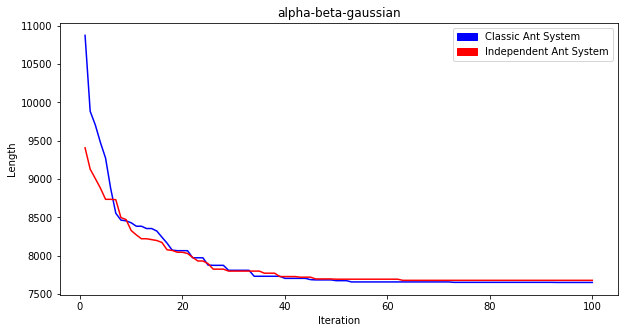

In [112]:
print("PARAMS: \n" +  
      "alfa = 2.0, beta = 3.0; gaussian in (-1,1); ants = 100 \n")

visualize()

PARAMS: 
alfa = 2.0, beta = 3.0; gaussian in (-2,2); ants = 100 

RESULTS: 
7677.99847444 - Classic Ant System best: 
7734.20828572 - Independent Ant System best 



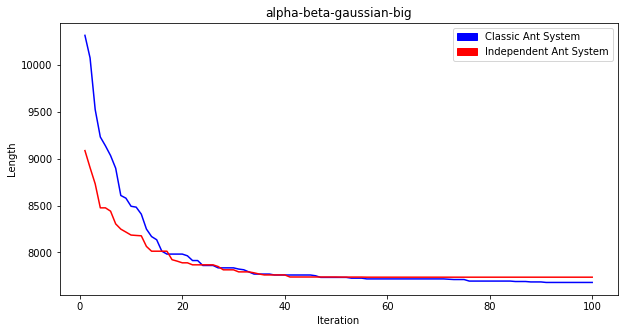

In [114]:
print("PARAMS: \n" +  
      "alfa = 2.0, beta = 3.0; gaussian in (-2,2); ants = 100 \n")

visualize()

PARAMS: 
alfa = 1.5, beta = 3.0; gaussian in (-1,1); ants = 100 

RESULTS: 
7654.21389099 - Classic Ant System best: 
7738.06021242 - Independent Ant System best 



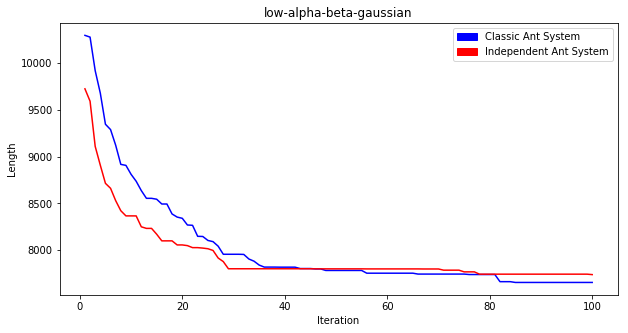

In [116]:
print("PARAMS: \n" +  
      "alfa = 1.5, beta = 3.0; gaussian in (-1,1); ants = 100 \n")

visualize()

PARAMS: 
alfa = 1.0, beta = 3.0; gaussian in (-1,1); ants = 100 

RESULTS: 
7982.08138304 - Classic Ant System best: 
7765.32393043 - Independent Ant System best 



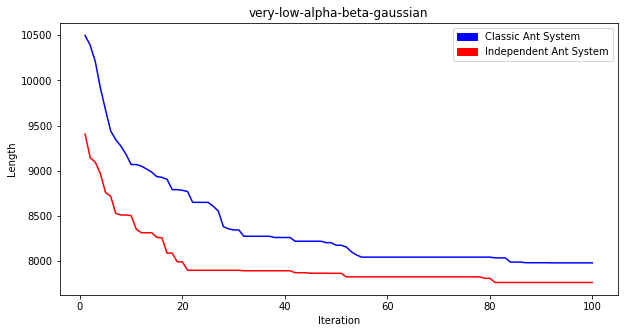

In [118]:
print("PARAMS: \n" +  
      "alfa = 1.0, beta = 3.0; gaussian in (-1,1); ants = 100 \n")

visualize()